<a href="https://colab.research.google.com/github/dujest/yolov5-workshop/blob/main/Yolov5_DeepSort_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/colab

In [ ]:
%cd /content/drive/MyDrive/colab

/content/drive/MyDrive/colab


# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
# !git clone --recurse-submodules https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet.git  # clone repo
%cd /content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet
!pip install -qr requirements.txt  # install dependencies
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
%cd ../yolov5
!pip install -r requirements.txt
clear_output()
%cd ../

/content/drive/MyDrive/colab


# Download youtube video and cut



In [ ]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.9 MB/s 


In [ ]:
!mkdir ./videos

In [ ]:
from pytube import YouTube
import os

def downloadYouTube(videourl, path):

    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    if not os.path.exists(path):
        os.makedirs(path)
    yt.download(path)

## Video 1

In [ ]:
downloadYouTube('https://www.youtube.com/watch?v=X6Thg-fjFsY', '/content/drive/MyDrive/colab/videos')

In [ ]:
# extract seconds worth of video frames of it
!yes | ffmpeg -ss 00:00:23 -i "/content/drive/MyDrive/colab/videos/Port of Tauranga  Time Lapse.mp4" -t 33 -c copy /content/drive/MyDrive/colab/videos/port.avi
clear_output()

In [ ]:
!ffmpeg -i "/content/drive/MyDrive/colab/videos/port.avi" /content/drive/MyDrive/colab/videos/port.mp4
clear_output()

## Video 2

In [ ]:
downloadYouTube('https://www.youtube.com/watch?v=6Qa1O39X_Es', '/content/drive/MyDrive/colab/videos')

In [ ]:
# extract seconds worth of video frames of it
!yes | ffmpeg -ss 00:0:10 -i "/content/drive/MyDrive/colab/videos/Port of Singapore.mp4" -t 50 -c copy /content/drive/MyDrive/colab/videos/portofsingapore.avi
clear_output()

In [ ]:
!ffmpeg -i "/content/drive/MyDrive/colab/videos/portofsingapore.avi" /content/drive/MyDrive/colab/videos/portofsingapore.mp4
clear_output()

# Run inference on videos

Download YOLOv5 pretrained weights

In [ ]:
%cd /content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet

/content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet


In [ ]:
!mkdir /content/drive/MyDrive/colab/weights

In [ ]:
!wget "https://github.com/ultralytics/yolov5/releases/download/v6.1/yolov5x.pt" -O /content/drive/MyDrive/colab/weights/yolov5x.pt

In [ ]:
!python track.py --yolo-weights "/content/drive/MyDrive/colab/weights/yolov5x.pt" \
                 --strong-sort-weights osnet_x0_25_msmt17.pt \
                 --source "/content/drive/MyDrive/colab/videos/port.mp4" \
                 --save-vid

In [ ]:
!python track.py --yolo-weights "/content/drive/MyDrive/colab/weights/yolov5x.pt" \
                 --strong-sort-weights osnet_x0_25_msmt17.pt \
                 --source "/content/drive/MyDrive/colab/videos/portofsingapore.mp4" \
                 --line-thickness 2 \
                 --save-vid

# Show results

In [ ]:
!mkdir /content/drive/MyDrive/colab/screenshots

In [ ]:
!ffmpeg -ss 00:00:1.8 -i "/content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet/runs/track/exp3/port.mp4" -frames:v 1 /content/drive/MyDrive/colab/screenshots/port.png
clear_output()

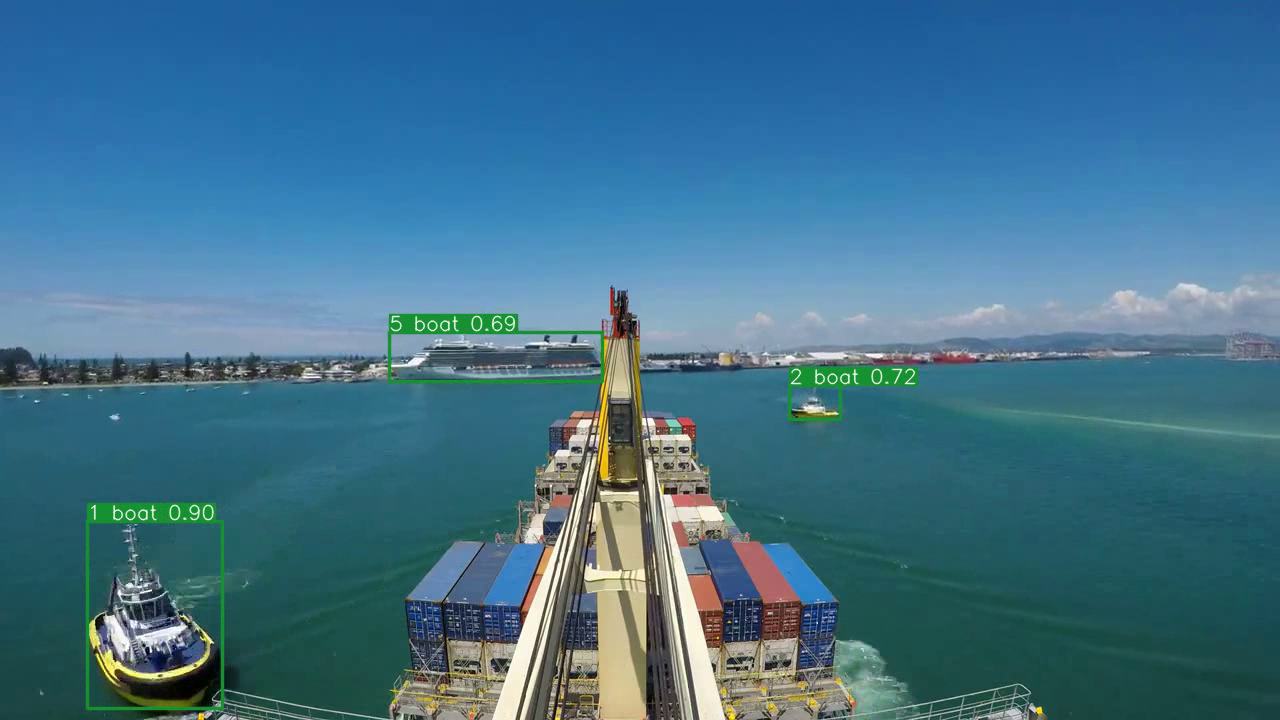

In [ ]:
Image(filename='/content/drive/MyDrive/colab/screenshots/port.png', width=700)

**The full inference is available on the following link:**
https://vimeo.com/manage/videos/748102588

In [ ]:
!mkdir /content/drive/MyDrive/colab/results

In [ ]:
!ffmpeg -ss 00:00:00 -i "/content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet/runs/track/exp3/port.mp4" -t 3 /content/drive/MyDrive/colab/results/port.gif
clear_output()

In [ ]:
!ffmpeg -ss 00:00:3 -i "/content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet/runs/track/exp4/portofsingapore.mp4" -frames:v 1 /content/drive/MyDrive/colab/screenshots/portofsingapore.png
clear_output()

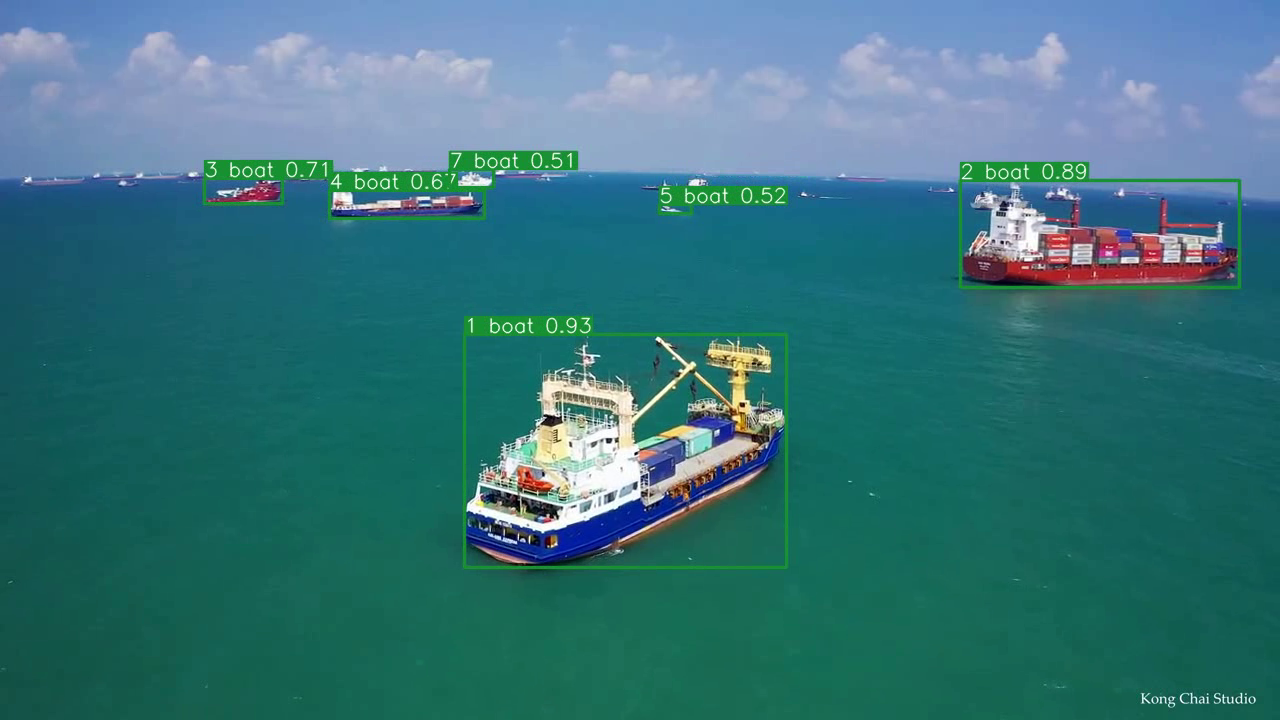

In [ ]:
Image(filename='/content/drive/MyDrive/colab/screenshots/portofsingapore.png', width=700)

**The full inference is available on the following link:**
https://vimeo.com/manage/videos/748103111

In [ ]:
!ffmpeg -ss 00:00:02 -i "/content/drive/MyDrive/colab/Yolov5_StrongSORT_OSNet/runs/track/exp4/portofsingapore.mp4" -t 3 /content/drive/MyDrive/colab/results/portofsingapore.gif
clear_output()